## Rapport : Résolution de Problèmes / Machine Learning

#### IMT Mines Alès Octobre 2022
##### INFRES 13 
- **Quentin BIALOTA**
- **Alexandre BOMPUIS**
- **Julia LOCATELLI**
- **Tom L'HERMENIER**

![Logo IMT](https://www.fondation-mines-telecom.org/wp-content/uploads/2018/02/imt_mines_ales-300x158.jpg)

---

Dans le cadre de du cours de **ANN & Deep learning** à l'IMT Mines Alès, nous avons réalisé un projet de notre choix, visant à résoudre un problème de machine learning, le tout en évaluant et comparant quelques modèles pour la résolution du problème. Dans ce projet, nous avons choisi de traiter une problématique visant à prédire les vêtements qu'on peut observer dans une image donné. Cette prédiction se fera à partir de différentes caractéristiques, notamment le sexe de la personne sur l'image, les catégories du vêtement (vêtement, accessoire, etc), et d'autres.

---

Afin de traiter ce problème, nous avons décidé d'utiliser un dataset déjà existant et disponible sur le site Kaggle. Ce dataset nommé "Fashion Product Images" est accessible au lien suivant : https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

In [9]:
## Import everything needed

from IPython.display import display

import pandas as pd
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

df = pd.read_csv("fashion-dataset-small/styles.csv", on_bad_lines='skip')

In [10]:
## Dataset visualization

display("Dataset size", df.size)
display("First ten rows of the dataset", df.head(10))

display(df.subCategory.value_counts().sort_values())

'Dataset size'

444240

'First ten rows of the dataset'

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


Vouchers                        1
Home Furnishing                 1
Sports Accessories              3
Wristbands                      4
Beauty Accessories              4
Umbrellas                       6
Perfumes                        6
Water Bottle                    7
Bath and Body                  12
Hair                           19
Gloves                         20
Sports Equipment               21
Shoe Accessories               24
Mufflers                       38
Eyes                           43
Skin                           69
Skin Care                      77
Stoles                         90
Free Gifts                    104
Apparel Set                   106
Cufflinks                     108
Scarves                       118
Accessories                   129
Ties                          258
Headwear                      293
Makeup                        307
Nails                         329
Saree                         427
Loungewear and Nightwear      470
Dress         

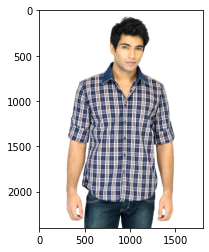

In [3]:
image = cv2.imread("fashion-dataset/images/15970.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()